_version log: comparing previous code with ideal interferogram_

In [1]:
from numpy import genfromtxt
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import pandas as pd

beamABroadband = genfromtxt('data\\0307_BB_BA.csv', delimiter=';')
beamBBroadband=genfromtxt('data\\0307_BB_BB.csv', delimiter=';')
fringesBroadband=genfromtxt('data\\0307_fringesBB.csv', delimiter=';')

print(fringesBroadband.shape)

(512, 640)


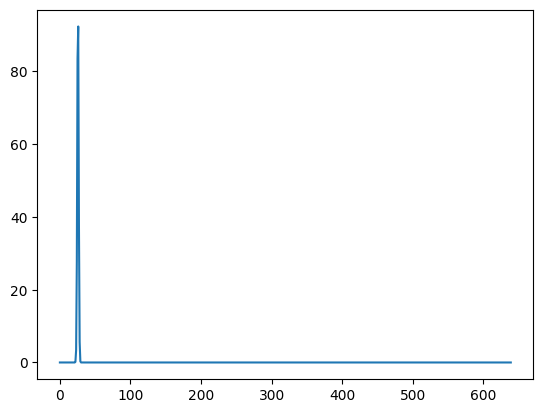

In [2]:
def gaussian_line(x, x0, dx): #orginally created by Elin
    return np.exp(-(x - x0) ** 2 / (2 * dx ** 2))


width = 640
height = 512
wavelength = 50 #in pixels
bandwidth = 1
angle = 0 #in degrees

# Start with a gaussian spectrum of frequencies
frequency = width*2 / wavelength
freqs = np.arange(-width,width)
FT = gaussian_line(freqs, frequency, bandwidth) + gaussian_line(freqs, -frequency, bandwidth)
FT = 100*FT

#plt.plot(freqs,
#         FT)
plt.plot(freqs[len(freqs)//2:],
         FT[len(freqs)//2:])
plt.show()

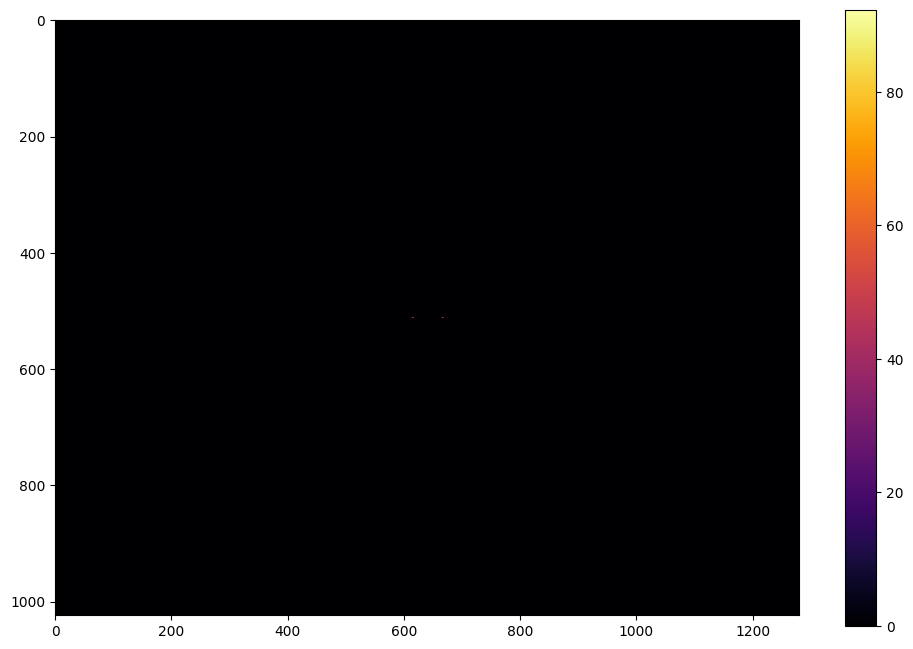

In [3]:
# Rotate spectrum
FT2 = np.zeros((height*2, len(FT)))
FT2[height,:] = FT
#FT = np.abs(FT)
FT2 = ndimage.rotate(FT2, angle, reshape = False)

# inverse fourier
interferogram = np.fft.ifft2(FT2, norm = "forward")
interferogram = np.fft.fftshift(interferogram)
interferogram = np.abs(interferogram)


plt.figure(figsize = (12,8))
im=plt.imshow(np.abs(FT2), cmap='inferno')
plt.colorbar(im)
plt.show()

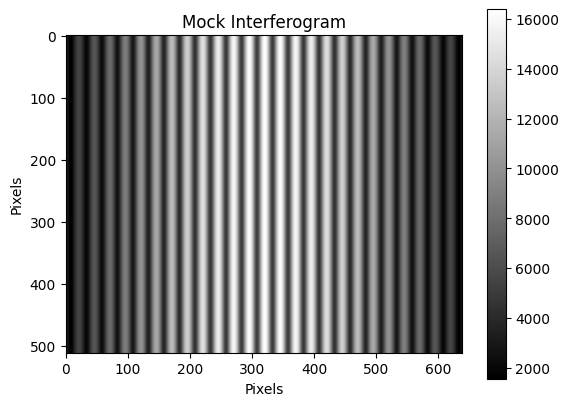

In [4]:
#alternatively do it the other way around

# inverse fourier to get interferogram
#interferogram = np.vstack([np.fft.ifft(FT, norm = "forward")]*height*2)
#interferogram = np.fft.fftshift(interferogram)

# Rotate interferogram
#interferogram = np.abs(interferogram)
#interferogram = ndimage.rotate(interferogram, angle, reshape = False)

# Crop interferogram
width_center = int(width)
height_center = int(height)
interferogram = interferogram[height_center-height//2 : height_center+height//2,
                                width_center-width//2 : width_center+width//2]

def visualize_interferogram(interferogram): #orginally generated by chatgpt
    plt.imshow(interferogram, cmap='gray')
    plt.colorbar()
    plt.title('Mock Interferogram')
    plt.xlabel('Pixels')
    plt.ylabel('Pixels')
    plt.show()

interferogram = ndimage.gaussian_filter(interferogram, sigma = 3)
interferogram = np.round((interferogram * 2**14) /interferogram.max()) #mimic the format of the real data

visualize_interferogram(interferogram)


In [5]:
np.savetxt("data\\mock_interferogram.csv", interferogram, delimiter = ";", fmt = "%d")

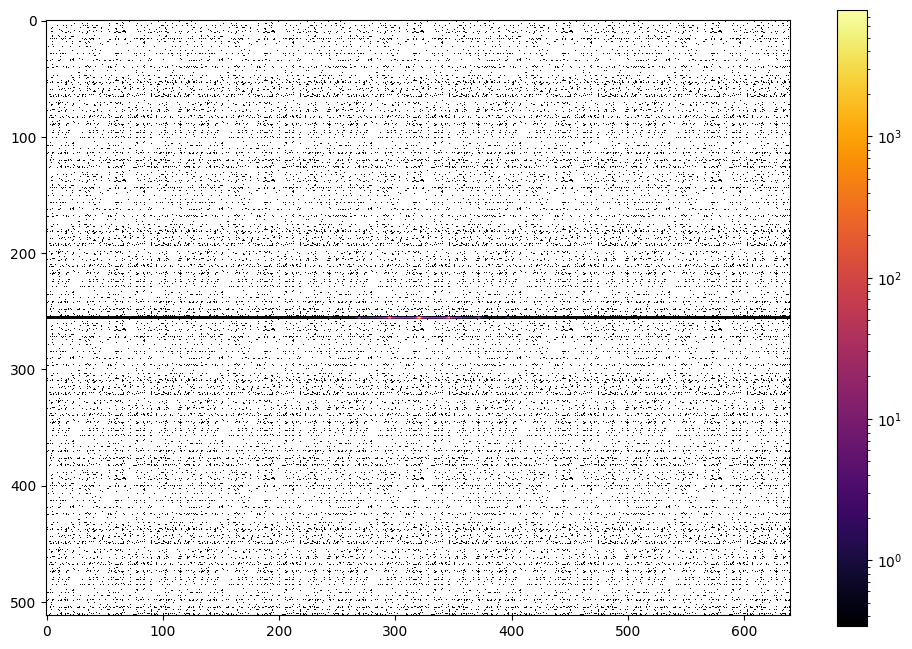

In [6]:
# fourier transform again to check deteriation of signal
interferogram = genfromtxt('data\\mock_interferogram.csv', delimiter=';')

FT2 = np.fft.fft2(interferogram, norm = "forward")
FT2 = np.fft.fftshift(FT2)
FT2 = np.abs(FT2)

plt.figure(figsize = (12,8))
im=plt.imshow(np.abs(FT2), cmap='inferno', norm = "log")
plt.colorbar(im)
plt.show()